In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv("PlasticSales.csv")
data.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [3]:
data.shape

(60, 2)

In [4]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = data.set_index(['Month'])
indexedDataset.head(5)

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030


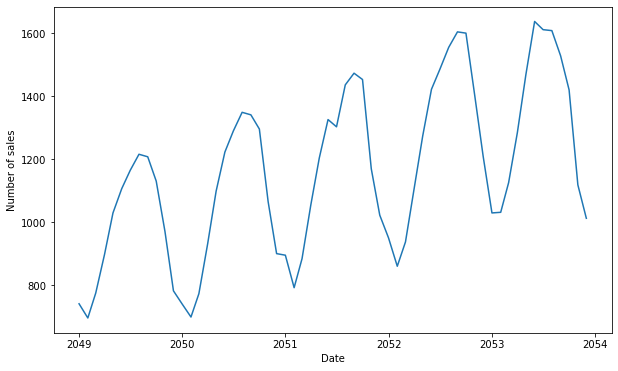

In [5]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of sales')
plt.plot(indexedDataset)

In [6]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                  Sales
Month                  
2049-01-01          NaN
2049-02-01          NaN
2049-03-01          NaN
2049-04-01          NaN
2049-05-01          NaN
2049-06-01          NaN
2049-07-01          NaN
2049-08-01          NaN
2049-09-01          NaN
2049-10-01          NaN
2049-11-01          NaN
2049-12-01   977.000000
2050-01-01   976.916667
2050-02-01   977.166667
2050-03-01   977.000000
2050-04-01   979.833333
2050-05-01   985.583333
2050-06-01   995.250000
2050-07-01  1005.666667
2050-08-01  1016.750000
2050-09-01  1027.833333
2050-10-01  1041.583333
2050-11-01  1049.500000
2050-12-01  1059.333333
2051-01-01  1072.250000
2051-02-01  1080.000000
2051-03-01  1089.250000
2051-04-01  1099.500000
2051-05-01  1108.250000
2051-06-01  1116.833333
2051-07-01  1117.916667
2051-08-01  1125.166667
2051-09-01  1136.166667
2051-10-01  1149.250000
2051-11-01  1157.916667
2051-12-01  1168.083333
2052-01-01  1172.666667
2052-02-01  1178.333333
2052-03-01  1182.750000
2052-04-01  1187

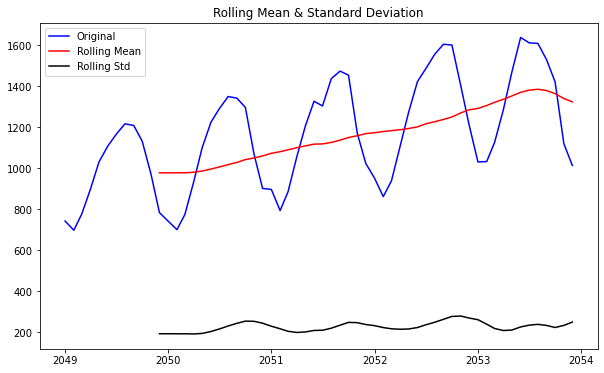

In [7]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
#Perform Augmented Dickey–Fuller test:
from numpy import log
result = adfuller(data.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.742564
p-value: 0.835414


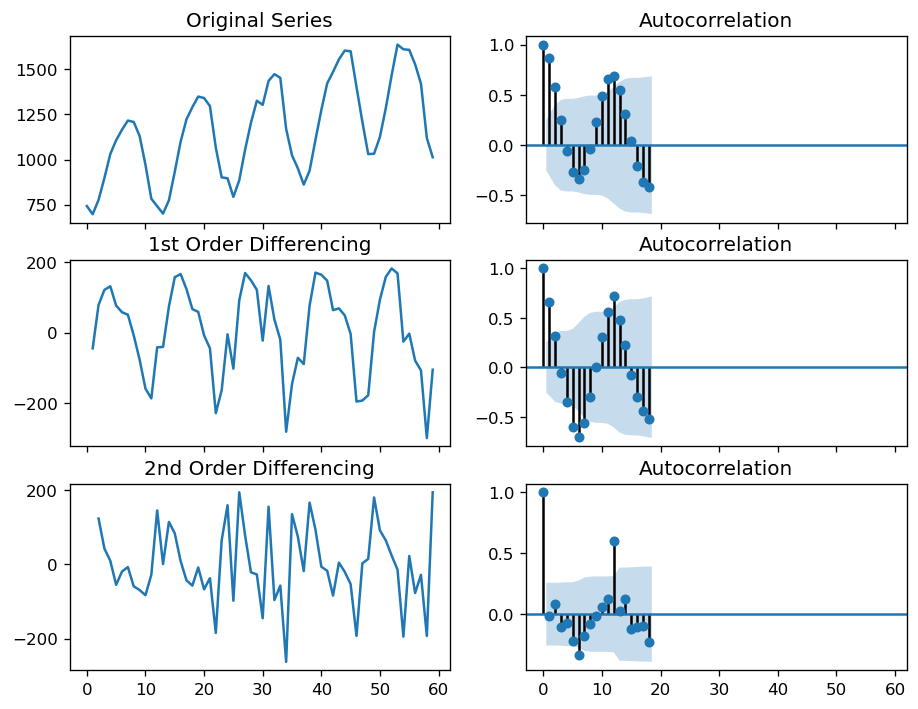

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.Sales); axes[0, 0].set_title('Original Series')
plot_acf(data.Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

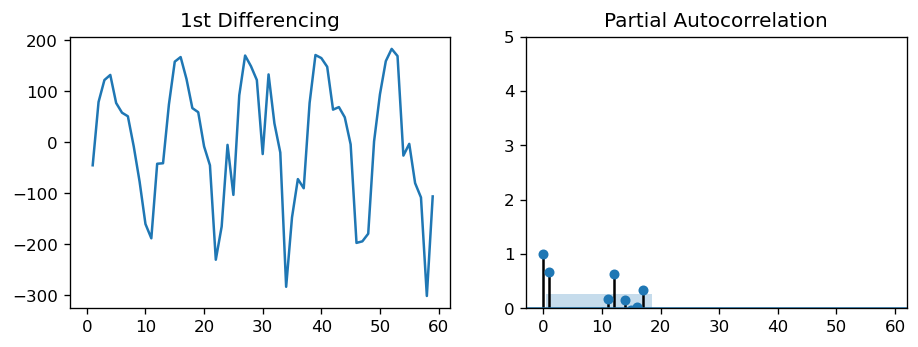

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Sales.diff().dropna(), ax=axes[1])

plt.show()

In [11]:
# 1,1,1 ARIMA Model
model = ARIMA(data.Sales, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -353.789
Method:                       css-mle   S.D. of innovations             95.366
Date:                Sat, 13 Feb 2021   AIC                            717.577
Time:                        10:39:10   BIC                            727.965
Sample:                             1   HQIC                           721.632
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3376      4.549      1.613      0.107      -1.578      16.253
ar.L1.D.Sales     0.7939      0.094      8.452      0.000       0.610       0.978
ma.L1.D.Sales    -0.4082      0.097     

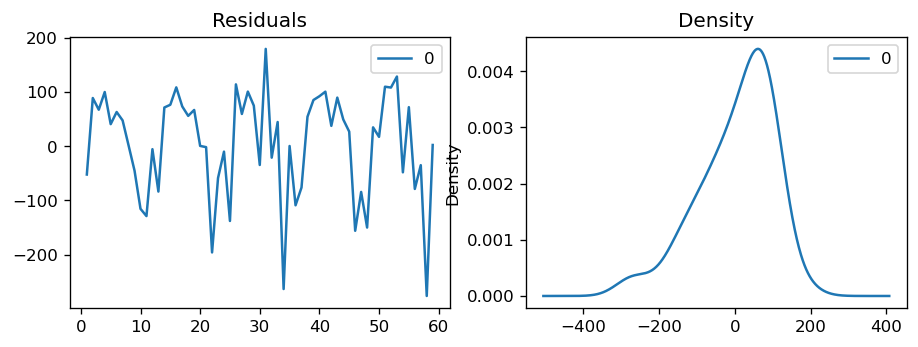

In [12]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

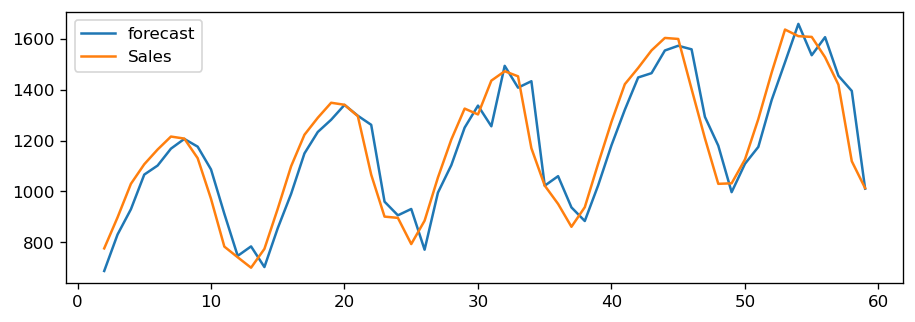

In [13]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [14]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.Sales[:40]
test = data.Sales[40:]

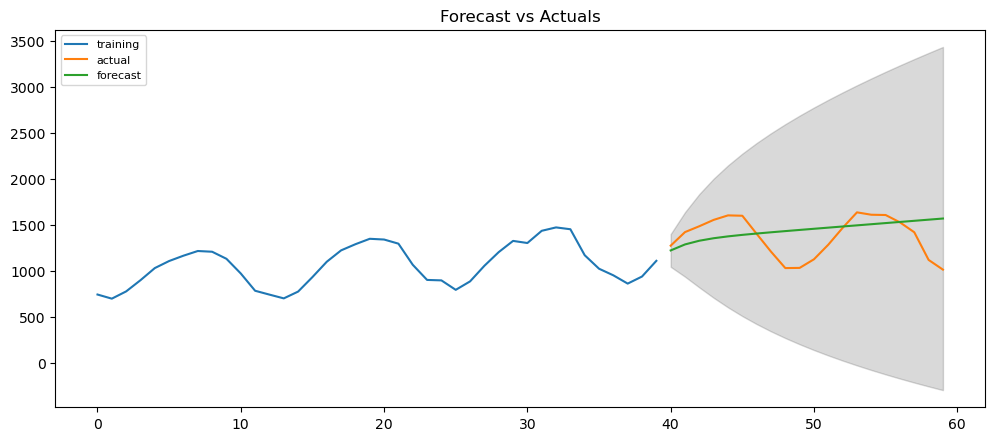

In [15]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\python-install1\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.16490947237449188,
 'me': 68.70917280378904,
 'mae': 200.05898641503472,
 'mpe': 0.0801248591974941,
 'rmse': 251.00622217030212,
 'acf1': 0.7398285536111483,
 'corr': -0.12315633802240801,
 'minmax': 0.13249587982221622}

## Around 16.49% MAPE implies the model is about 83.51% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.